### Detección de anomalías - PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from tqdm import tqdm
import PCAs_errorReconstruccion_primerCuarto
from PCAs_errorReconstruccion_primerCuarto import *

In [2]:
df_stats_Ch1_test2 = pd.read_csv("estadisticos_test2_ch1.csv" , sep = ',')
X_Ch1 = df_stats_Ch1_test2[['Min', 'Max', 'Kurt', 'ImpFactor', 'RMS', 'MargFactor', 'Skewness',
               'ShapeFactor', 'PeakToPeak', 'CrestFactor']].values

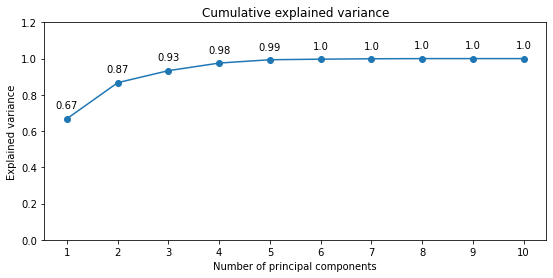

In [3]:
# Primera aproximación:
pca_pipeline = make_pipeline(StandardScaler(), PCA())
pca_pipeline.fit(X_Ch1)

# Proyección de los datos
modelo_pca = pca_pipeline.named_steps['pca']
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
ax.plot(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum, marker = 'o')

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate( label, (x,y), textcoords = "offset points", xytext = (0,10), ha = 'center')

ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Cumulative explained variance')
ax.set_xlabel('Number of principal components')
ax.set_ylabel('Explained variance');

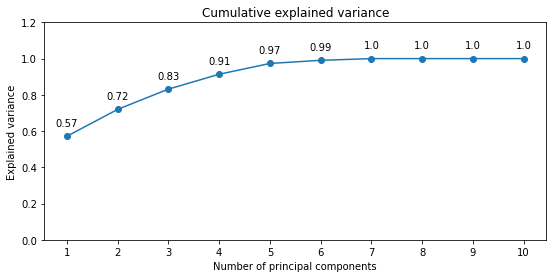

In [4]:
pca_pipeline = make_pipeline(StandardScaler(), PCA())
pca_pipeline.fit(X_Ch1[:int(len(X_Ch1)/4)])

modelo_pca = pca_pipeline.named_steps['pca']
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
ax.plot(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum, marker = 'o')

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate( label, (x,y), textcoords = "offset points", xytext = (0,10), ha = 'center')

ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Cumulative explained variance')
ax.set_xlabel('Number of principal components')
ax.set_ylabel('Explained variance');

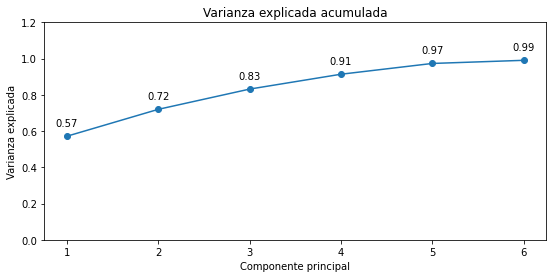

In [5]:
reconstruccion, error_reconstruccion = pca_reconstruccion_error_reconstruccion_primerCuarto(df_stats_Ch1_test2, 6, imp = 1)

Text(0.5, 1.0, 'Distribución de los errores de reconstrucción (PCA)')

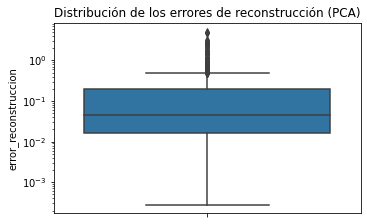

In [6]:
df_resultados = pd.DataFrame({
                    'error_reconstruccion' : error_reconstruccion,
                })

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 3.5))
sns.boxplot(
    y     = 'error_reconstruccion',
    data  = df_resultados,
    #color = "white",
    palette = 'tab10',
    ax    = ax
)
ax.set_yscale("log")
ax.set_title('Distribución de los errores de reconstrucción (PCA)')

In [7]:
df_resultados.quantile(0.98)[0]

1.1690546654366853

C:\Users\jspardo\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jspardo\Miniconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


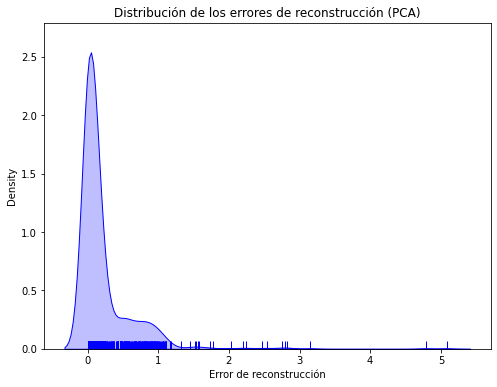

In [8]:
# Distribución del error de reconstrucción
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.distplot(
    error_reconstruccion,
    hist    = False,
    rug     = True,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)
ax.set_title('Distribución de los errores de reconstrucción (PCA)')
ax.set_xlabel('Error de reconstrucción');

C:\Users\jspardo\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


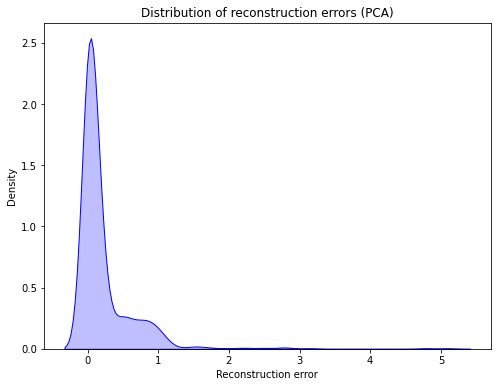

In [9]:
# Distribución del error de reconstrucción
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.distplot(
    error_reconstruccion,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)
ax.set_title('Distribution of reconstruction errors (PCA)')
ax.set_xlabel('Reconstruction error');

C:\Users\jspardo\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jspardo\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


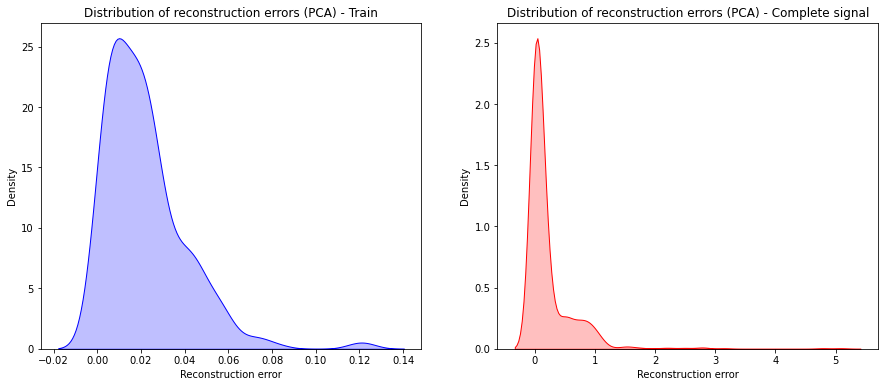

In [10]:
# Entrenamiento modelo PCA con escalado de los datos
X_primerCuarto = X_Ch1[:int(len(X_Ch1)/4)]
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components = 6))
pca_pipeline.fit(X_primerCuarto)
    
# Proyectar los datos
proyecciones_train = pca_pipeline.transform(X_primerCuarto)
    
# Reconstrucción
reconstruccion_train = pca_pipeline.inverse_transform(X = proyecciones_train)
    
# RMSE: 
error_reconstruccion_train = np.sqrt(((reconstruccion_train - X_primerCuarto) ** 2).mean(axis=1))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(
    error_reconstruccion_train,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax1
)
ax1.set_title('Distribution of reconstruction errors (PCA) - Train')
ax1.set_xlabel('Reconstruction error');

sns.distplot(
    error_reconstruccion,
    hist    = False,
    rug     = False,
    color   = 'red',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax2
)
ax2.set_title('Distribution of reconstruction errors (PCA) - Complete signal')
ax2.set_xlabel('Reconstruction error');

C:\Users\jspardo\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jspardo\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


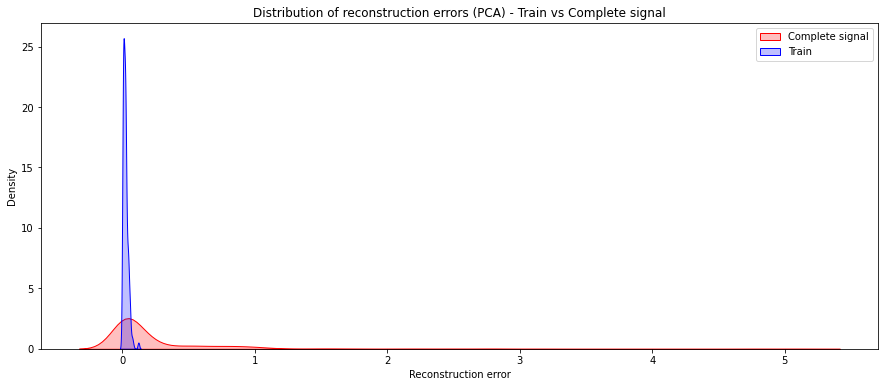

In [11]:
# Entrenamiento modelo PCA:
X_primerCuarto = X_Ch1[:int(len(X_Ch1)/4)]
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components = 6))
pca_pipeline.fit(X_primerCuarto)
    
# Proyectar los datos
proyecciones_train = pca_pipeline.transform(X_primerCuarto)
    
# Reconstrucción
reconstruccion_train = pca_pipeline.inverse_transform(X = proyecciones_train)
    
# RMSE: 
error_reconstruccion_train = np.sqrt(((reconstruccion_train - X_primerCuarto) ** 2).mean(axis=1))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.distplot(
    error_reconstruccion,
    hist    = False,
    rug     = False,
    color   = 'red',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax,
    label = 'Complete signal'
)
sns.distplot(
    error_reconstruccion_train,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax,
    label = 'Train'
)
ax.set_title('Distribution of reconstruction errors (PCA) - Train vs Complete signal')
ax.set_xlabel('Reconstruction error');
ax.legend()



In [12]:
error_reconstruccion = error_reconstruccion.values

In [13]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=33).fit(error_reconstruccion[int(len(error_reconstruccion)/4):].reshape(-1, 1))
gm.means_

array([[0.06547723],
       [0.73872314]])

C:\Users\jspardo\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


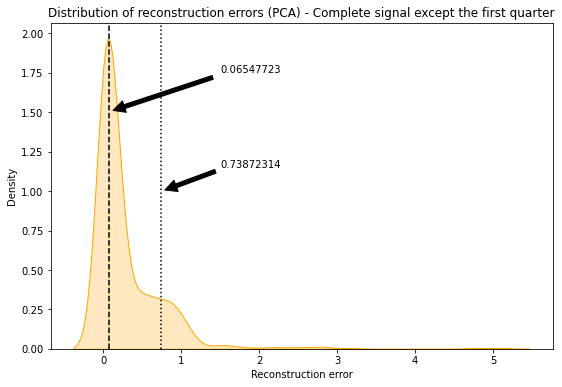

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
sns.distplot(
    error_reconstruccion[int(len(error_reconstruccion)/4):],
    hist    = False,
    rug     = False,
    color   = 'orange',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)
ax.axvline(gm.means_[0], ls = '--', color = 'black')
ax.annotate(str(round(gm.means_[0][0],8)), xy=(0.05, 1.5), xytext=(1.5, 1.75),
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.axvline(gm.means_[1], ls = ':', color = 'black')
ax.annotate(str(round(gm.means_[1][0],8)), xy=(0.75, 1), xytext=(1.5, 1.15),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_title('Distribution of reconstruction errors (PCA) - Complete signal except the first quarter')
ax.set_xlabel('Reconstruction error');

In [15]:
pred_GM = gm.predict(error_reconstruccion[int(len(error_reconstruccion)/4):].reshape(-1, 1))
sum(pred_GM)

219

In [16]:
pred_GM = [0] * int(len(error_reconstruccion)/4)
pred_GM_3cuartos = gm.predict(error_reconstruccion[int(len(error_reconstruccion)/4):].reshape(-1, 1))
for i in range(len(pred_GM_3cuartos)):
    pred_GM.append(pred_GM_3cuartos[i])
pred_GM = np.array(pred_GM)

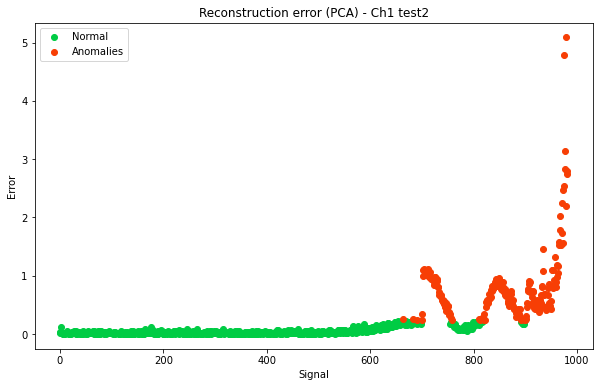

In [17]:
colores = ["#00cc44", "#f73e05"]
n_signal = list(range(len(pred_GM)))
n_signal = np.array(n_signal)
signals_0 = n_signal[pred_GM == 0]
error_rec_0 = error_reconstruccion[pred_GM == 0]
signals_1 = n_signal[pred_GM == 1]
error_rec_1 = error_reconstruccion[pred_GM == 1]
plt.figure(figsize=(10,6))
plt.scatter(signals_0, error_rec_0, c = "#00cc44", label = 'Normal')
plt.scatter(signals_1, error_rec_1, c = "#f73e05", label = 'Anomalies')
plt.title('Reconstruction error (PCA) - Ch1 test2')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend()

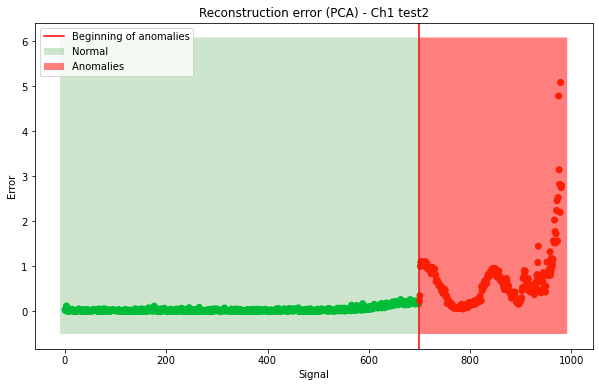

In [18]:
comienzo_1hora_anomalias = 'NA'
for i in range(len(pred_GM)):
    if pred_GM[i:i+6].all():
        comienzo_1hora_anomalias = i
        break
        
pred_GM_1hora_anomalias = [0] * comienzo_1hora_anomalias + [1] * (len(pred_GM) - comienzo_1hora_anomalias)
colores = ["#00cc44", "#f73e05"]
x = np.arange(-10, len(df_stats_Ch1_test2)+10, 0.02)
n_signal = list(range(len(pred_GM_1hora_anomalias)))
plt.figure(figsize=(10,6))
plt.scatter(n_signal, error_reconstruccion, c = np.take(colores, pred_GM_1hora_anomalias))
plt.axvline(comienzo_1hora_anomalias, color = 'r', label = 'Beginning of anomalies')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where = x < comienzo_1hora_anomalias, 
                         facecolor = 'green', alpha = 0.2, label = 'Normal')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where =  x > comienzo_1hora_anomalias, 
                         facecolor = 'red', alpha = 0.5, label = 'Anomalies ')
plt.title('Reconstruction error (PCA) - Ch1 test2')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend(loc = 2)

In [19]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=33).fit(error_reconstruccion[int(len(error_reconstruccion)/4):].reshape(-1, 1))
gm.means_

array([[0.06545012],
       [0.63167289],
       [2.16595816]])

Text(0.5, 1.0, 'Errores reconstrucción - Ch1 test2')

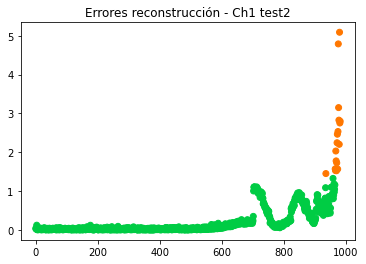

In [20]:
colores = ["#00cc44", "#00cc44", "#ff7700"]
pred_GM = gm.predict(error_reconstruccion.reshape(-1, 1))
n_signal = list(range(len(pred_GM)))
plt.scatter(n_signal, error_reconstruccion, c = np.take(colores, pred_GM))
plt.title('Errores reconstrucción - Ch1 test2')

#### Z-Scores

In [21]:
from scipy import stats
zscore_train = stats.zscore(error_reconstruccion_train)

In [22]:
mean = np.mean(error_reconstruccion_train)
std = np.std(error_reconstruccion_train)
std

0.018621255213615077

In [23]:
zscore = (error_reconstruccion - mean) / std

In [24]:
threshold = 3
outlier = [0] * len(error_reconstruccion_train)
for i in range(len(error_reconstruccion_train), len(error_reconstruccion)):
    z = (error_reconstruccion[i] - mean) / std
    if abs(z) > threshold:
        outlier.append(1)
    else:
        outlier.append(0)
outlier = np.array(outlier)

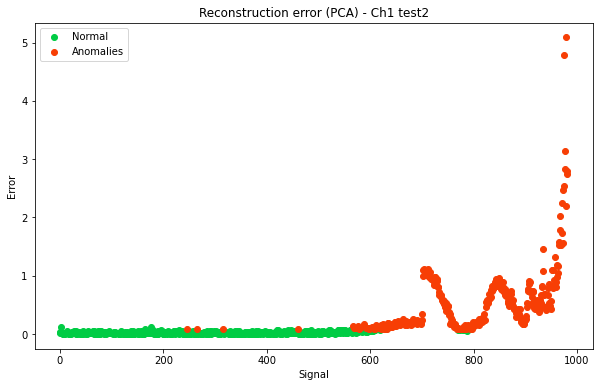

In [25]:
n_signal = list(range(len(error_reconstruccion)))
n_signal = np.array(n_signal)
signals_0 = n_signal[outlier == 0]
error_rec_0 = error_reconstruccion[outlier == 0]
signals_1 = n_signal[outlier == 1]
error_rec_1 = error_reconstruccion[outlier == 1]
plt.figure(figsize=(10,6))
plt.scatter(signals_0, error_rec_0, c = "#00cc44", label = 'Normal')
plt.scatter(signals_1, error_rec_1, c = "#f73e05", label = 'Anomalies')
plt.title('Reconstruction error (PCA) - Ch1 test2')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend()

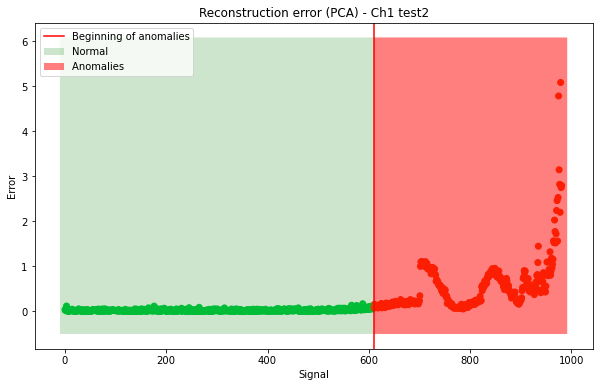

In [26]:
z = (error_reconstruccion - mean) / std
comienzo_1hora_ouliers = 'NA'
for i in range(len(error_reconstruccion_train), len(error_reconstruccion)):
    if (abs(z[i:i+6]) > threshold).all():
        comienzo_1hora_ouliers = i
        break

colores = ["#00cc44", "#f73e05"]
zscores_1hora_anomalias = [0] * comienzo_1hora_ouliers + [1] * (len(z) - comienzo_1hora_ouliers)
x = np.arange(-10, len(df_stats_Ch1_test2) + 10, 0.02)
n_signal = list(range(len(zscores_1hora_anomalias)))
plt.figure(figsize=(10,6))
plt.scatter(n_signal, error_reconstruccion, c = np.take(colores, zscores_1hora_anomalias))
plt.axvline(comienzo_1hora_ouliers, color = 'r', label = 'Beginning of anomalies')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where = x < comienzo_1hora_ouliers, 
                         facecolor = 'green', alpha = 0.2, label = 'Normal')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where =  x > comienzo_1hora_ouliers, 
                         facecolor = 'red', alpha = 0.5, label = 'Anomalies ')
plt.title('Reconstruction error (PCA) - Ch1 test2')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend(loc = 2)

#### Tiempo hasta el fallo:

In [27]:
print('Comienzo de anomalías cuando se producen durante una hora')
print('GMM:', (len(error_reconstruccion) - comienzo_1hora_anomalias) * 10, ' minutos')
print('Z-Scores:', (len(error_reconstruccion) - comienzo_1hora_ouliers) * 10, ' minutos')
print('Duración total de la señal:', len(error_reconstruccion) * 10, ' minutos')

Comienzo de anomalías cuando se producen durante una hora
GMM: 2820  minutos
Z-Scores: 3720  minutos
Duración total de la señal: 9820  minutos


#### Errores de reconstrucción de cada estadístico

In [28]:
error = np.abs(reconstruccion[['Min', 'Max', 'Kurt', 'ImpFactor', 'RMS', 'MargFactor', 'Skewness',
               'ShapeFactor', 'PeakToPeak', 'CrestFactor']].values - X_Ch1)
params = ['Min', 'Max', 'Kurt', 'ImpFactor', 'RMS', 'MargFactor', 'Skewness',
               'ShapeFactor', 'PeakToPeak', 'CrestFactor']
error_min = error[:, 0]
error_max = error[:, 1]
error_kurt = error[:, 2]
error_if = error[:, 3]
error_rms = error[:, 4]
error_mf = error[:, 5]
error_skew = error[:, 6]
error_sf = error[:, 7]
error_ptp = error[:, 8]
error_cf = error[:, 9]

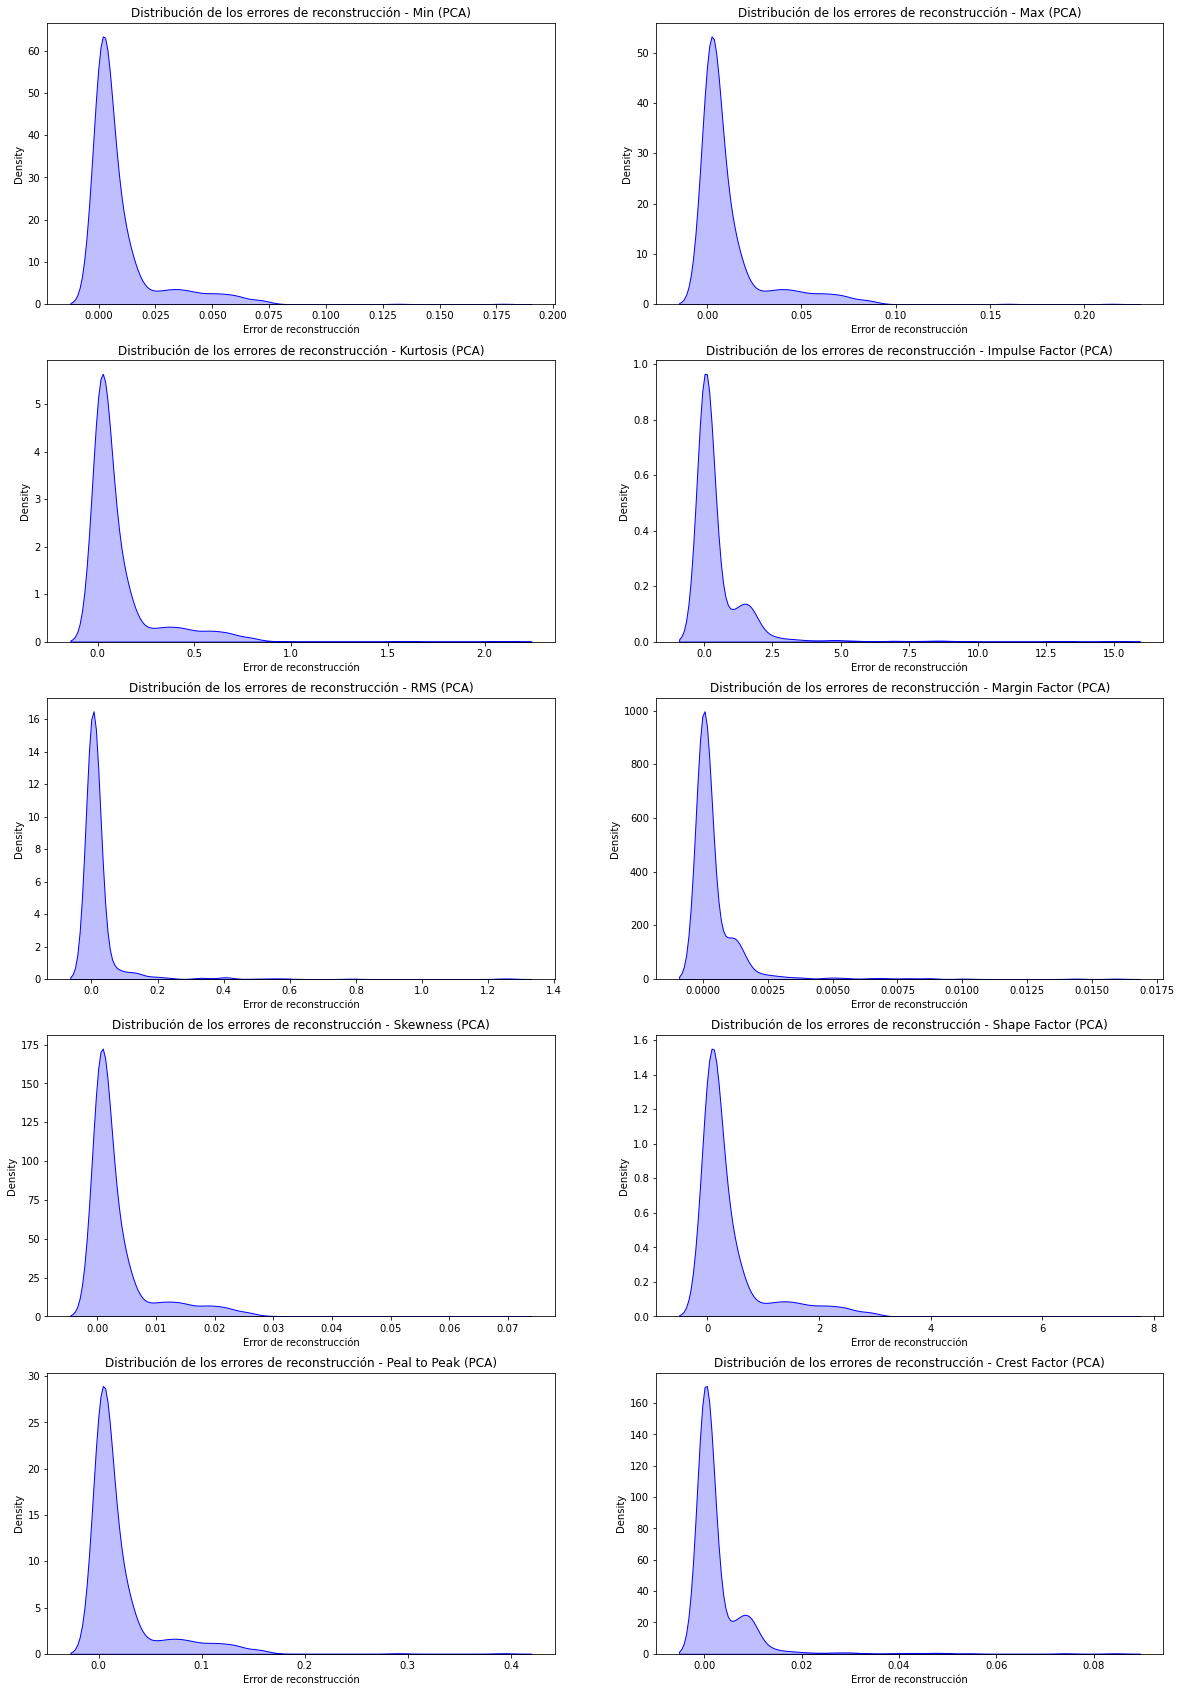

In [29]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
sns.distplot(
    error_min,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax1
)
ax1.set_title('Distribución de los errores de reconstrucción - Min (PCA)')
ax1.set_xlabel('Error de reconstrucción');

sns.distplot(
    error_max,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax2
)
ax2.set_title('Distribución de los errores de reconstrucción - Max (PCA)')
ax2.set_xlabel('Error de reconstrucción');

sns.distplot(
    error_kurt,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax3
)
ax3.set_title('Distribución de los errores de reconstrucción - Kurtosis (PCA)')
ax3.set_xlabel('Error de reconstrucción');

sns.distplot(
    error_if,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax4
)
ax4.set_title('Distribución de los errores de reconstrucción - Impulse Factor (PCA)')
ax4.set_xlabel('Error de reconstrucción');

sns.distplot(
    error_rms,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax5
)
ax5.set_title('Distribución de los errores de reconstrucción - RMS (PCA)')
ax5.set_xlabel('Error de reconstrucción');

sns.distplot(
    error_mf,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax6
)
ax6.set_title('Distribución de los errores de reconstrucción - Margin Factor (PCA)')
ax6.set_xlabel('Error de reconstrucción');

sns.distplot(
    error_skew,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax7
)
ax7.set_title('Distribución de los errores de reconstrucción - Skewness (PCA)')
ax7.set_xlabel('Error de reconstrucción');

sns.distplot(
    error_sf,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax8
)
ax8.set_title('Distribución de los errores de reconstrucción - Shape Factor (PCA)')
ax8.set_xlabel('Error de reconstrucción');

sns.distplot(
    error_ptp,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax9
)
ax9.set_title('Distribución de los errores de reconstrucción - Peal to Peak (PCA)')
ax9.set_xlabel('Error de reconstrucción');

sns.distplot(
    error_cf,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax10
)
ax10.set_title('Distribución de los errores de reconstrucción - Crest Factor (PCA)')
ax10.set_xlabel('Error de reconstrucción');